## Part 2

### Q1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Ruth Kassaye\Documents\CareerFoundery\DataImmersion\Achievement_4'

In [3]:
# Importing ords+prods_custs_merged.pkl file
ords_prods_custs= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs_merged.pkl'))

In [4]:
# Calling ords_prods_custs dataframe
ords_prods_custs.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,7.0,196,1,0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


### Q2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

 - I have done this in another notebook. I can share if requested. 

### Q3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

- In a markdown cell beneath your histogram, describe what the histogram demonstrates.

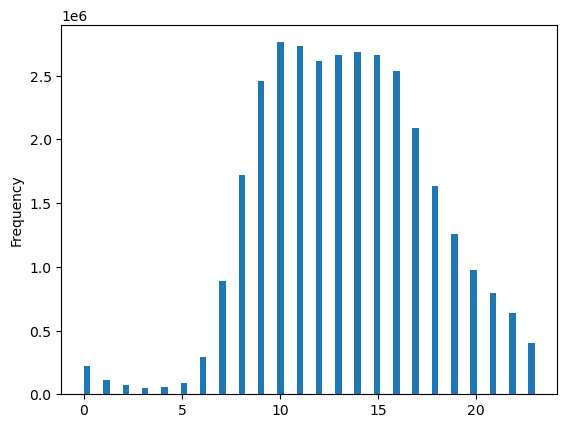

In [5]:
#Creating a histogram
hist = ords_prods_custs['order_hour_of_day'].plot.hist (bins=70)

In [6]:
# Exporting the histogram chart above 

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [7]:
# Printing descriptive statistics of the order_hour_of_day to better understand the distribution of the column 
ords_prods_custs['order_hour_of_day'].describe()

count    3.240486e+07
mean     1.342515e+01
std      4.246380e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

- The histogram shows that most of the orders come in between 10-16 o'clock (10am-4pm).


  -  Starting from 7 o'clock onwards orders start to rise up and reamin high until 15 o'clock (3pm). After 3pm, they start to decline. 
  

- And during 0-6 o'clock (mid-night to 6am) orders reach the most minimum record. 


- As we can see from the histogram above, the distribution is skewed to the right, i.e., mean 1.34 > median 1.3. 

### Q4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

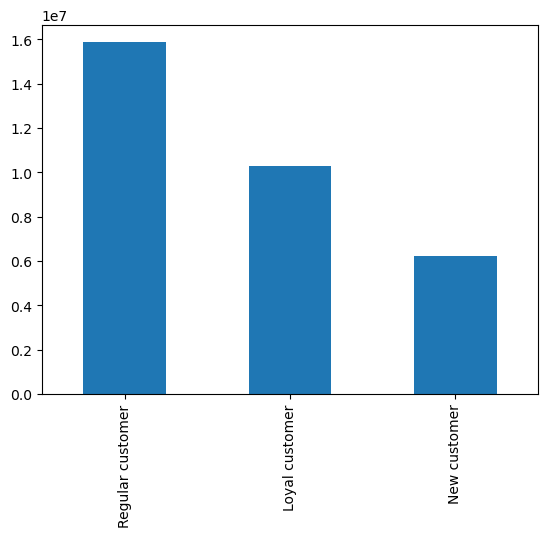

In [8]:
# Creating a bar chart for the 'loyalty_flag'
bar=ords_prods_custs['loyalty_flag'].value_counts().plot.bar()

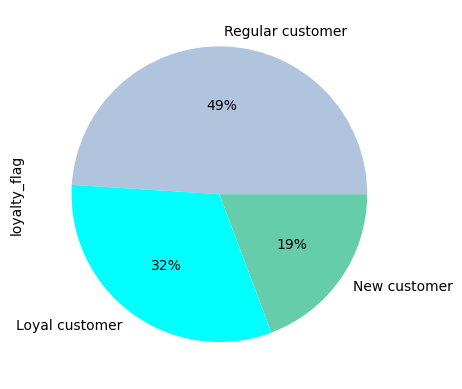

In [9]:
# Creating a pie chart for the loyalty_flag
pie1 = ords_prods_custs['loyalty_flag'].value_counts().plot.pie(y='Loyalty Distribution', autopct=('%1.f%%'), colors=['lightsteelblue','cyan', 'mediumaquamarine'])

 - **Reflection/observation**: Most of the customers are regular customers than loyal customers. 

In [10]:
# Exporting the bar chart above 

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [11]:
# Exporting the the pie chart above 

pie1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_loyalty_flag.png'))

### Q5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

 - Step one: creating a sampling data

In [12]:
# creating a list, i.e., dev, to store the boolean values- whether it is less than or equal to 0.8

np.random.seed(4)
dev = np.random.rand(len(ords_prods_custs)) <=0.8

In [13]:
# Calling dev list
dev

array([False,  True, False, ...,  True,  True,  True])

 - **Step two**: spliting the dataframe using the list created above

In [14]:
# Store 80% of the sample in the dataframe big

big= ords_prods_custs[dev]

In [15]:
# Store 20% of the sample in the dataframe small

small =ords_prods_custs[~dev]

- **Step three**: checking the samples (80% & 20%) are actually representative of the entire dataframe length(rows)

In [16]:
# Calling the length of the entire ords_prods_merge dataframe
len(ords_prods_custs)

32404859

In [17]:
# Calling the big and small subsets to check if the sum up the entire ords_prods_merge dataframe
len(big)+len(small)

32404859

-    **Reflection**: As per the outputs above the big and small lists stores the entire ords_prods_merge dataframe

 - **Step four**: now that my sampling is representative, it is time to create the line chart

In [18]:
# Storing the order_hour_of_day and prices columns records from the small subset
df = small[['order_hour_of_day', 'prices']]

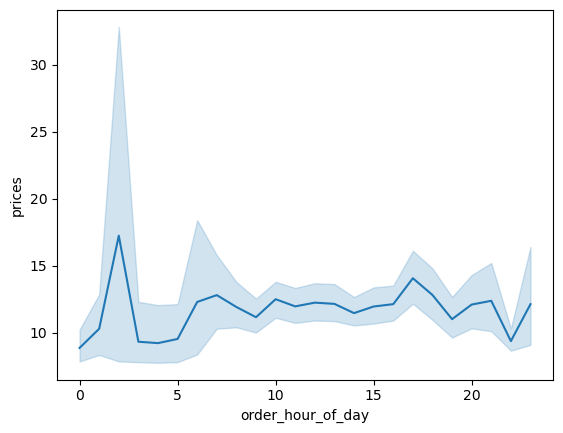

In [19]:
#Creating a line chart for the small subset group
line_hour = sns.lineplot(data = df, x= 'order_hour_of_day', y = 'prices')

 - The small sample line chart shows that that price gets higher around 2:30 o'clock and expereinces a steep fall until it reaches 5 o'clock. After 5 o'clock the prices starts to rise. 
 
 - Price remains stable between 10 o'clock and 15 o'clock.

In [20]:
# Exporting the line chart above 

line_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour_of_day.png'))

 #### How do I know my sample is representative of the bigger database, ords_prods_custs?
 
  - To answer this question, I need to run a line chart of my bigger sample (80%) or even of the entire dataframe

In [21]:
# Storing order_hour_of_day and prices columns of the big subset in df_2 dataframe
df_2= big[['order_hour_of_day', 'prices']]

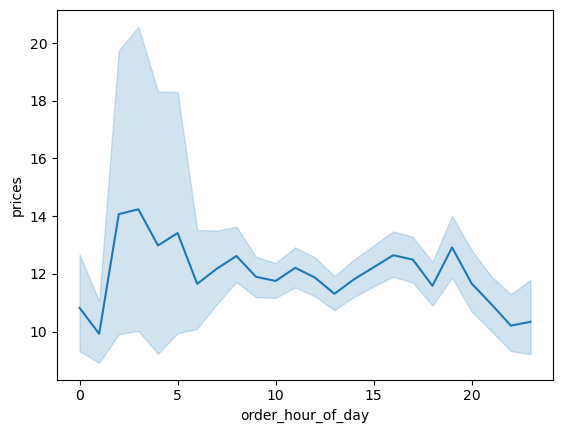

In [22]:
# Printing line chart of the big subset to check if it matches with the small sample line chart
line_2= sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

 - The small and bid subsets line chart forms a similar pattern.
 - The big sample line chart also shows that that price gets higher around 2:30 o'clock and expereinces a steep fall until around 5 o'clock. 
 - There is a steep fall of price around 19:40 o'clock.

### Q6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

 - In a markdown cell beneath your line chart, describe what the line chart shows.

In [23]:
# Storing the order_hour_of_day and prices columns records from the small subset
df_A = small[['age', 'n_dependants']]

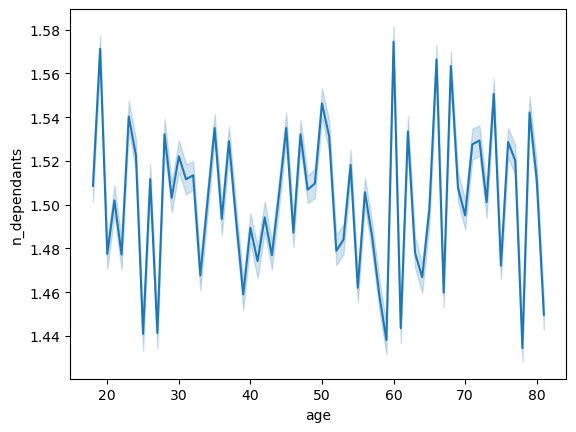

In [24]:
#Creating a line chart for the small subset group
line = sns.lineplot(data = df_A, x= 'age', y = 'n_dependants')

In [25]:
# Exporting the line chart above 

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_n_dependants.png'))

 - **Reflection**: There is no a uniform pattern that describes the two variables relationship

### Q7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

- In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

<AxesSubplot:xlabel='age', ylabel='income'>

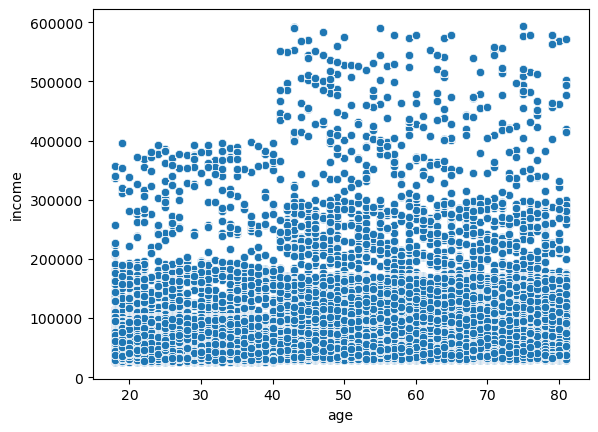

In [26]:
# Creatomg scatterplots for the entire dataframe, i.e., ords_prods_custs
sns.scatterplot(x = 'age', y = 'income', data = ords_prods_custs)

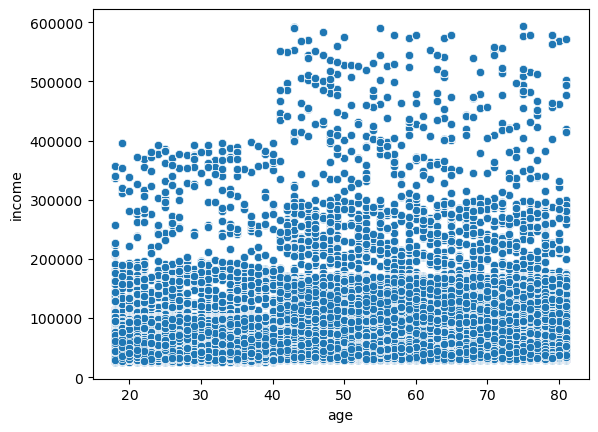

In [27]:
# Creating a scatterplot for the small subset
scatter=sns.scatterplot(x = 'age', y = 'income', data = small)

In [28]:
# Exporting the scatterplot of the small sample subset
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))

 - Both the samll  and the entire dataframe scatterplots don't provide clear of the relationship between age and income. Hence, I have used a correlation function to test the two variables relationship in my small subset group using - small.corr() 
 
 - The correlation result of the two variable is 0.4. This means that there a moderate relationship. Meaning as the customer age increases the salary (income) also increases. 
 
 

In [29]:
# Printing correlation of the small subset  
small.corr()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_price,median_days_since_prior_order,age,n_dependants,income
order_id,1.000000,-0.000368,-0.000496,0.001663,0.000968,0.000904,0.000058,-0.000020,-0.000502,-0.000278,-0.000726,-0.000203,-0.001299,-0.000170,0.000413,-0.000460,-0.001264,-0.001181
user_id,-0.000368,1.000000,-0.001012,-0.001906,-0.000506,0.000569,0.000696,0.000823,-0.000999,0.000114,-0.000988,0.000499,-0.001851,0.005637,0.000471,-0.001454,-0.002944,0.002397
order_number,-0.000496,-0.001012,1.000000,0.014740,-0.040032,-0.317316,-0.001987,-0.003274,0.306649,-0.000892,0.000260,-0.001116,0.717469,-0.008370,-0.434996,0.000263,-0.002731,0.017374
orders_day_of_week,0.001663,-0.001906,0.014740,1.000000,0.012419,-0.028148,-0.001755,-0.009540,-0.007190,-0.001931,0.004698,0.000463,0.019733,0.002327,-0.020709,0.002163,-0.000242,0.001422
order_hour_of_day,0.000968,-0.000506,-0.040032,0.012419,1.000000,0.002078,0.000877,-0.015344,-0.023430,-0.001461,-0.009183,0.000218,-0.044224,-0.000815,0.036173,0.002430,0.000352,0.008638
days_since_prior_order,0.000904,0.000569,-0.317316,-0.028148,0.002078,1.000000,0.000308,0.051565,-0.088239,0.005775,0.000481,0.000758,-0.448314,0.001678,0.563889,-0.001682,0.001673,-0.013215
product_id,0.000058,0.000696,-0.001987,-0.001755,0.000877,0.000308,1.000000,0.005154,0.004443,0.003135,-0.027857,0.001214,-0.001180,-0.001326,-0.000678,0.000157,0.000968,0.002082
add_to_cart_order,-0.000020,0.000823,-0.003274,-0.009540,-0.015344,0.051565,0.005154,1.000000,-0.132505,0.009221,0.029534,-0.001351,-0.017252,0.001231,0.028410,-0.004871,0.001096,0.031308
reordered,-0.000502,-0.000999,0.306649,-0.007190,-0.023430,-0.088239,0.004443,-0.132505,1.000000,0.003845,-0.039897,0.000977,0.254403,-0.006160,-0.186993,-0.000772,-0.000210,-0.009537
aisle_id,-0.000278,0.000114,-0.000892,-0.001931,-0.001461,0.005775,0.003135,0.009221,0.003845,1.000000,0.062131,0.005488,-0.001148,0.003536,0.000883,0.000032,-0.001080,0.009284


### Q8. Export your visualizations as “.png” files in your relevant project folder.

- **Done.**